### Finding redundant Variables

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2

In [31]:
df = pd.read_pickle('nhl_short.pckl')

In [32]:
df[
    [
        'teams.away.score',
        'teams.home.score'
    ]
]

,teams.away.score,teams.home.score
0,4,3
1,2,3
2,9,4
3,3,2
4,2,3
...,...,...
1461,4,6
1462,3,2
1463,1,3
1464,2,6


Contingency table and chi square

In [33]:
contingency_table = pd.crosstab(
    df['home.teamStats.teamSkaterStats.powerPlayGoals'],
    df['away.teamStats.teamSkaterStats.powerPlayGoals']
)

In [34]:
contingency_table

away.teamStats.teamSkaterStats.powerPlayGoals,0.0,1.0,2.0,3.0,4.0,5.0
home.teamStats.teamSkaterStats.powerPlayGoals,,,,,,
0.0,433,219,55,13,1,0
1.0,294,169,49,5,1,1
2.0,79,78,18,3,0,0
3.0,20,12,7,2,0,0
4.0,2,4,1,0,0,0


In [35]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=28.733719841749288, pvalue=0.09313641491842893, dof=20, expected_freq=array([[4.07222374e+02, 2.37054570e+02, 6.39358799e+01, 1.13117326e+01,
        9.83628922e-01, 4.91814461e-01],
       [2.93132333e+02, 1.70639836e+02, 4.60231924e+01, 8.14256480e+00,
        7.08049113e-01, 3.54024557e-01],
       [1.00534789e+02, 5.85238745e+01, 1.57844475e+01, 2.79263302e+00,
        2.42837653e-01, 1.21418827e-01],
       [2.31568895e+01, 1.34802183e+01, 3.63574352e+00, 6.43246930e-01,
        5.59345157e-02, 2.79672578e-02],
       [3.95361528e+00, 2.30150068e+00, 6.20736698e-01, 1.09822647e-01,
        9.54979536e-03, 4.77489768e-03]]))

Automatic feature selection whith scikit learn

In [21]:
chi2(
    df[
        [
            'away.teamStats.teamSkaterStats.pim',
            'away.teamStats.teamSkaterStats.shots',
            'away.teamStats.teamSkaterStats.powerPlayOpportunities',
            'away.teamStats.teamSkaterStats.blocked',
            'away.teamStats.teamSkaterStats.takeaways',
            'away.teamStats.teamSkaterStats.giveaways',
            'away.teamStats.teamSkaterStats.hits'
        ]
    ],
    df['home.teamStats.teamSkaterStats.powerPlayOpportunities']
)

(array([3386.78411438,  224.42334091,  220.00412518,  184.6678981 ,
          60.79647113,  110.73900568,  217.20132632]),
 array([0.00000000e+00, 6.18037870e-42, 5.15378008e-41, 1.11326003e-33,
        6.59293594e-09, 1.30400816e-18, 1.97661836e-40]))

Correlation

<Axes: xlabel='away.teamStats.teamSkaterStats.pim', ylabel='away.teamStats.teamSkaterStats.shots'>

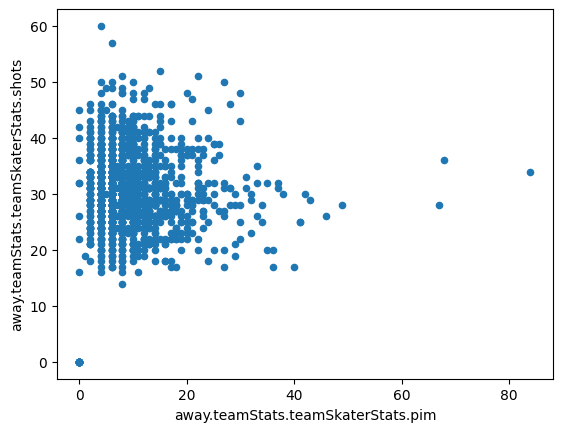

In [67]:
df.plot.scatter(
    'away.teamStats.teamSkaterStats.pim',
    'away.teamStats.teamSkaterStats.shots'
)

<Axes: xlabel='home.teamStats.teamSkaterStats.shots', ylabel='home.teamStats.teamSkaterStats.goals'>

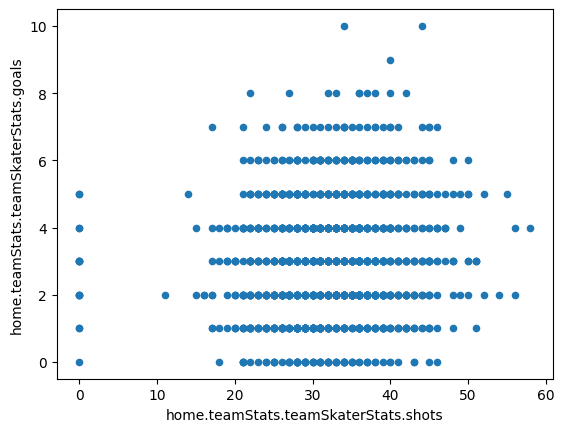

In [69]:
df.plot.scatter(
    'home.teamStats.teamSkaterStats.shots',
    'home.teamStats.teamSkaterStats.goals'
)



In [71]:
df[
    [
    'home.teamStats.teamSkaterStats.shots',
    'home.teamStats.teamSkaterStats.goals'
    ]
].corr()


,home.teamStats.teamSkaterStats.shots,home.teamStats.teamSkaterStats.goals
home.teamStats.teamSkaterStats.shots,1.000000,0.100566
home.teamStats.teamSkaterStats.goals,0.100566,1.000000
